# Set de datos personalizados

Los set de datos personalizados son aquellos que contienen sus elementos separadas en clases específicas orientadas a separar datos o resolver problemas específicos.

PyTorch nos proveerá los siguientes set de datos:

<center><img src="img/data_sets_ejemplos.png"></center>

Para esto nos valdrémos de una parte del set de datos FOOD 101.

Realizaremos lo siguiente:

1) Obtendrémos un set de datos de pyTorch.

2) Preparamos estos datos para que puedan ser manipulados por nuestra libreria.

3) Transformaremos los datos a tensores o los adaptaremos a nuestro modelo.

4) Cargaremos y manipularemos datos con funciones predefinidas o no.

5) Realizaremos el modelo para reconocer que comida es.

6) Compararemos el modelo con o sin etiquetas

7) Relizaremos predicciones.

In [1]:
import torch
from torch import nn

# Obtendrémos los datos

In [ ]:
import requests
import zipfile
from pathlib import Path

# Configurar directorios
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Si no existe la ruta descarga y crea lo mismo
if image_path.is_dir():
  print(f"El directorio {image_path} ya existe")
else:
  print(f"{image_path} no existe, creandolo...")
  image_path.mkdir(parents=True, exist_ok=True)
  image_path

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

El directorio data\pizza_steak_sushi ya existe
Descomprimiento archivo...


In [7]:
# Si bien ya tenemos los datos lo cierto es que es un archivo comprimido, debemos valernos de funciones de python3 para descomprimir y manipular nuestros nuevos datos

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Descomprimiento archivo...")
  zip_ref.extractall(image_path)

Descomprimiento archivo...


# Explorando nuestro set de datos

Dado que nuestro set de datos es una parte del set de datos food 101 y que el bootcamp lo muestra como contenido exploremos las características de este.





In [8]:
import os
def explorando_directorio(dir_path):
  for ruta_directorio, nombre_directorio, nombre_archivos in os.walk(dir_path):
    print(f"Hay {len(nombre_directorio)} directorios y {len(nombre_archivos)} en {ruta_directorio}")

explorando_directorio(image_path)


Hay 2 directorios y 0 en data\pizza_steak_sushi
Hay 3 directorios y 0 en data\pizza_steak_sushi\test
Hay 0 directorios y 25 en data\pizza_steak_sushi\test\pizza
Hay 0 directorios y 19 en data\pizza_steak_sushi\test\steak
Hay 0 directorios y 31 en data\pizza_steak_sushi\test\sushi
Hay 3 directorios y 0 en data\pizza_steak_sushi\train
Hay 0 directorios y 78 en data\pizza_steak_sushi\train\pizza
Hay 0 directorios y 75 en data\pizza_steak_sushi\train\steak
Hay 0 directorios y 72 en data\pizza_steak_sushi\train\sushi


In [9]:
# Rutas de datos de entrenamiento y prueba

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

# Visualizando las imagenes del set de datos

Ya teniendo nuestro set de datos podrémos visualizar las imagenes, para eso realizaremos los siguientes pasos:
1. Obtener las rutas de las imagenes
2. Obtendrémos una imagen aleatoria con random.choice()
3. Obtendrémos la clase de la imagen con stem
4. Las abriremos con PIL
5. Mostrarémos la imagen con la metadata de esta.

En la ubicación data\pizza_steak_sushi\test\sushi\2394442.jpg hay una imagen con la clase sushi, la imagen es:


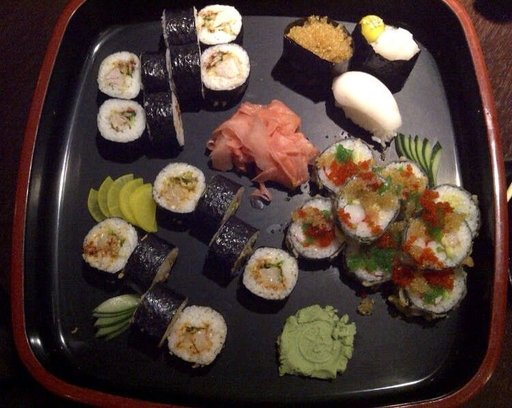

In [10]:
import random
from PIL import Image

random.seed(42)
# 1. Rutas de las imagenes, el asterico asigna todas las posibilidades posibles y el list() las transforma en una lista
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Imagen aleatoria
random_image_path = random.choice(image_path_list)
# random_image_path

# 3. Clase de la imagen aleatoria
image_class = random_image_path.parent.stem
# image_class

# 4. Abriremos la imagen con PIL, buscar documentación asociada
img = Image.open(random_image_path)
# img

# 5. Imprimir metadatos, todo lo obtenido hasta ahora
print(f"En la ubicación {random_image_path} hay una imagen con la clase {image_class}, la imagen es:")
img





(np.float64(-0.5), np.float64(511.5), np.float64(407.5), np.float64(-0.5))

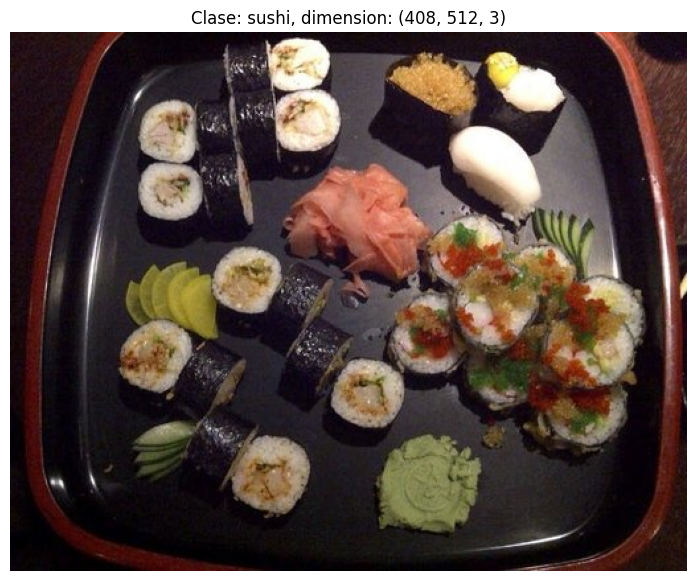

In [11]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Clase: {image_class}, dimension: {img_as_array.shape}")
plt.axis(False)

In [12]:
# img_as_array

# Transformando imagenes a tensores

Ahora bien, ya tenemos las imagenes, para que estas sean valiosas en nuestros modelos debemos transformas a tensores, es decir: representaciones númericas de nuestras imagenes.

Debemos también instanciar un objeto dataset y dataloader

In [13]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [14]:
data_transform = transforms.Compose([
                                     transforms.Resize(size=(64, 64)),
                                     transforms.RandomHorizontalFlip(p=0.5), # Ver que hace esto, no tengo idea, en la documentación hay ejemplos muy buenos
                                     transforms.ToTensor()
                                     ]) # La imagen debe ser pasada como PIL, es por esto que previamente la abrimos en este formato

data_transform(img)

tensor([[[0.0824, 0.0824, 0.0863,  ..., 0.1412, 0.1373, 0.1294],
         [0.0902, 0.0902, 0.0902,  ..., 0.1412, 0.1373, 0.1255],
         [0.1137, 0.0980, 0.1059,  ..., 0.1333, 0.1412, 0.1294],
         ...,
         [0.1412, 0.1373, 0.1294,  ..., 0.0157, 0.0196, 0.0157],
         [0.1333, 0.1373, 0.1255,  ..., 0.0275, 0.0275, 0.0275],
         [0.1255, 0.1294, 0.1137,  ..., 0.0275, 0.0314, 0.0314]],

        [[0.0431, 0.0431, 0.0392,  ..., 0.0667, 0.0588, 0.0588],
         [0.0353, 0.0431, 0.0392,  ..., 0.0667, 0.0549, 0.0588],
         [0.0392, 0.0471, 0.0471,  ..., 0.0627, 0.0627, 0.0510],
         ...,
         [0.0667, 0.0667, 0.0667,  ..., 0.0078, 0.0078, 0.0039],
         [0.0667, 0.0706, 0.0706,  ..., 0.0118, 0.0118, 0.0118],
         [0.0667, 0.0667, 0.0667,  ..., 0.0196, 0.0157, 0.0118]],

        [[0.0745, 0.0706, 0.0706,  ..., 0.0667, 0.0667, 0.0667],
         [0.0863, 0.0902, 0.0941,  ..., 0.0863, 0.0784, 0.0784],
         [0.1137, 0.1059, 0.0941,  ..., 0.0941, 0.0863, 0.

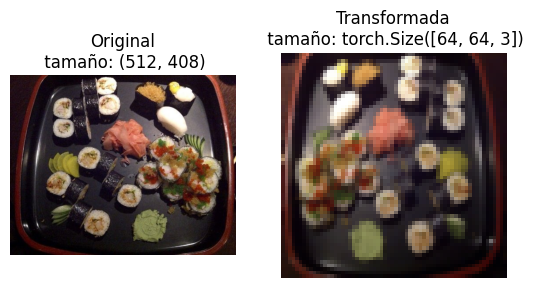

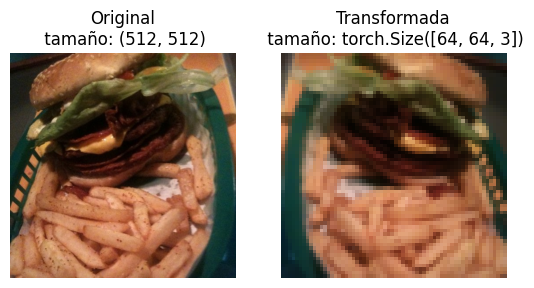

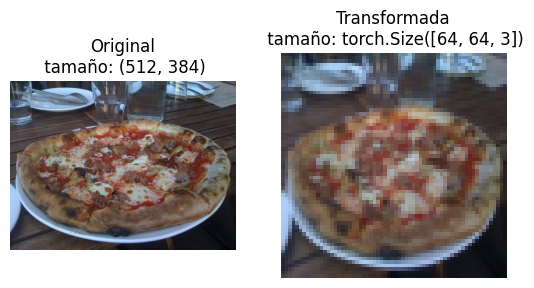

In [15]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  if seed:
    random.seed(seed)

  random_images_paths = random.sample(image_paths, k=n)
  for image_path in random_images_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2) # nrows, ncols
      ax[0].imshow(f)
      ax[0].set_title(f"Original\n tamaño: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1, 2, 0) # Matplotlib no acepta otro tamaño, debemos cambiarlo
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformada\n tamaño: {transformed_image.size()}")
      ax[1].axis(False)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

# Cargar imagenes con ImageFolder

Opción 1 para transformar imagenes a tensores.

In [16]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
classes_name = train_data.classes

class_dict = train_data.class_to_idx

classes_name, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [18]:
img, label = train_data[0][0], train_data[0][1]
print(f"Tensor de imagen: \n {img}")

Tensor de imagen: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ...

# Permute: ejemplo especifico

Si bien no es nada del otro mundo, al aprenderlo debemos tener un ejemplo a mano

Tamaño de la imagen origonal: torch.Size([3, 64, 64])
Tamaño de la imagen permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

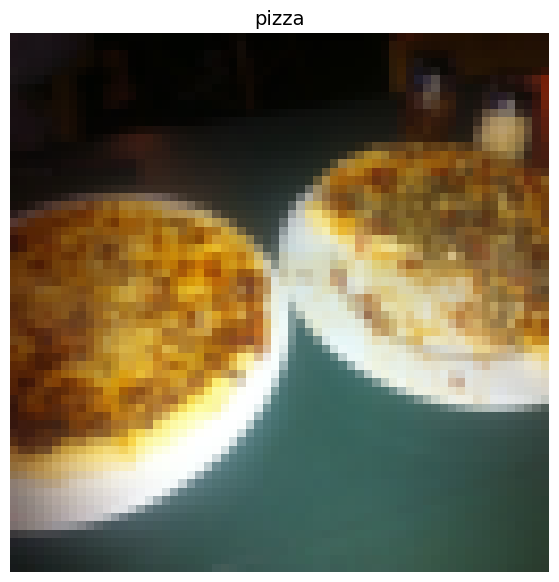

In [19]:
print(f"Tamaño de la imagen origonal: {img.shape}") # colores, altura, anchura
img_permute = img.permute(1, 2, 0)
print(f"Tamaño de la imagen permute: {img_permute.shape}") # altura, anchura, colores

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(classes_name[label], fontsize=14)

# Transformar imagenes en *data loaders*.

Un dataloader nos ayudará a transformar nuestros set de datos en una estructura iterable, podrémos configurar el tamaño de los bloques de datos porque podrémos ver todas las imagenes a la vez.

In [20]:
from torch.utils.data import DataLoader
# os.cpu_count()

BATH_SIZE = 1

train_data_loader =  DataLoader(dataset=train_data,
                                batch_size=BATH_SIZE,
                                # num_workers=os.cpu_count()
                                num_workers=1,
                                shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATH_SIZE,
                              num_workers=1,
                              shuffle=False)

len(train_data_loader), len(test_data_loader)

(225, 75)

In [21]:
img, label = next(iter(train_data_loader))

print(f"Tamaño de la imagen: {img.shape}")
print(f"Tamaño del label: {label.shape}") # Buscar que es esto, acá me perdí bastante

Tamaño de la imagen: torch.Size([1, 3, 64, 64])
Tamaño del label: torch.Size([1])


# Cargar dataset customizado

Esta es la segunda opción.
Debemos:
1. Poder obtener las imagenes desde un archivo
2. Poder obtener los nombres de las clases del dataset.
3. Poder obtener los nombres de las clases como un diccionario.

Los pro de esto son:
1. Podrémos crear un set de datos de lo que sea.
2. No estarémos limitados por las funciones de creación de datasets pre-construidas.

Las contras son:
1. Así creemos un set de datos a gusto, no quiere decir que funcione correctamente.
2. Usar set de datos personalizados hará casi siempre que tendrámos que realizar más código, generando a veces inconvenientes y bugs.

Los set de datos personalizados oficiales de PyTorch se encuentran en el siguiente enlace: https://docs.pytorch.org/docs/stable/data.html

In [22]:
# Librerias a utilizar

import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

Nos valdrémos entonces de una función para obtener el nombre de las clases:

1. Obtener el nombre de la clase usando os.scandir()
2. Si no se encuentra el nombre de la clase lanzar una interrupción.
3. Convertir las clases en un diccionario.

In [23]:
target_directory = train_dir
print(f"Directorio: {target_directory}")

# Obtendrémos el nombre de las clases iterando la lista por compresión
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Directorio: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [24]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]: # Al retornar dos estructuras python las acomodará en una lista
    # La estructura a retornar será una tupla con una lista y diccionario como elementos, es bastante rebuscado pero así lo hace el curso
    # No es mi fuerte la compresión, sin embargo se utiliza muchísimo...

    # 1. Obtener clases por compresión SI EXISTE EL DIRECTORIO:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir()) 

    # 2. Si no se encuentran clases lanzar una interrupción:
    if not classes:
        raise FileNotFoundError(f"No hay clases en el direectorio {directory}...")
    
    # 3. Crear un diccinario con labels como indice, aunuque siempre que se pueda es mejor utilizar numeros
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

Para crear nuestro set de datos realizaremos los siguientes pasos:
1. Instanciaremos una subclase de torch.utils.data.Dataset.
2. Iniciaremos nuestra subclase con el directorio que contiene nuestros datos y tranformaremos nuestros datos para manipularlos a gusto.
3. Crearemos la clase con los siguentes atributos:

- paths: ruta de nuestras imagenes
- transform: asignaremos que tipo de transformación utilizaremos
- classes: lista de las clases de salida
- class_to_idx: diccionario con las clases mapeadas el etiquetas o labels de tipo int

4. Crear una función que abra las imagenes, load_images().
5. Sobreescribir el método _ _len()_ _ para que retorne el largo de nuestro set de datos.
6. Sobreescribir el método _ _getitem()_ _ para que nos retorne los ejemplares pasados vía índice

In [25]:
# 1. Instanciaremos una subclase de torch.utils.data.Dataset

class ImageFolderCustom(Dataset):
    # 2. Creamos el constructor con los atributos correspondientes (3) con sus correspondientes atributos
    def __init__(self, 
                 target_dir: str,
                  transform = None):
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(target_dir)

    # 4. Imagen para abrir imagenes

    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. Sobreescribiremos __len__()
    def __len__(self) -> int:
        return len(self.paths)
    
    # 6. Sobreescribiremos getitem()
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]
        
        if self.transform:
            return self.transform(img), class_idx 
        else:
            return img, class_idx

In [26]:
# img

train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor() 
])

In [27]:
train_data_custom = ImageFolderCustom(target_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(target_dir=test_dir,
                                     transform=test_transforms)

In [28]:
# No tengo idea de que acabo de hacer, sin embargo al ser estructuras de datos y entrenamiento y contar con el atributo .classes estas, tal como contempla el curso, deberían ser iguales: no queremos comprobar con sushi como es una pizza ni al reves.

print(train_data_custom.classes == train_data.classes) 
print(test_data_custom.classes == test_data.classes)

True
True


# Mostrar imagenes de forma aleatoria

1. Acceder a nuestro set de datos declarando la correspondiente función junto a sus variables y estructuras a utilizar, no es tarea fácil
2. Asignar un maximo de imagenes a visualizar, no hace falta que sean muchas, no se termina más sino.
3. Asignar un valor aleatorio seed.
4. Obtener una lista con los indices del set de datos y los elementos a graficar.
5. Crear un gráfico con matplotlib.
6. Iterar la lista y graficar las imagenes.
7. Verificar si las dimensiones son validas.

In [29]:
# 1. Declaramos la función c 
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    # 2. Asignamos un valor maximo
    if n>10:
        n = 10
        display_shape = False
    
    # 3. Valor random seed
    if seed:
        random.seed(seed)

    # 4. Lista con los indices del set de datos 
    random_sample_idx = random.sample(range(len(dataset)), k=n)
    
    # 5. Creamos el grafico

    plt.figure(figsize=(16, 8))

    # 6. Iterar la lista y graficar los elementos asociados a los indices correspondientes
    for i, targ_sample in enumerate(random_sample_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Acomodamos los tensores acorde a las dimensiones pedidas por matploblib
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Gráficar elementos 
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
        
        if classes:
            title = f"Clase: {classes[targ_label]}"
            if display_shape:
                title = title + f"\n tamaño: {targ_image_adjust.shape}"
        plt.title(title)

In [30]:
# Código de prueba
# random_sample = random.sample(range(len(train_data_custom)), k=10)
# random_sample

# Pruebas de la función

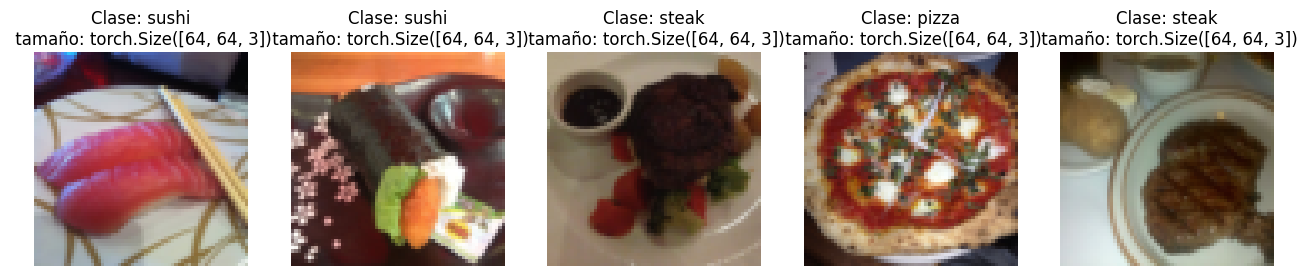

In [32]:
display_random_images(train_data, 
                      n=5,
                      classes=classes_name,
                      seed=None)

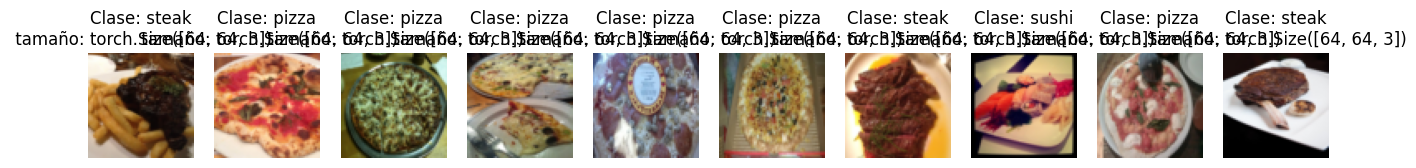

In [33]:
display_random_images(train_data, 
                      n=10,
                      classes=classes_name,
                      seed=None)

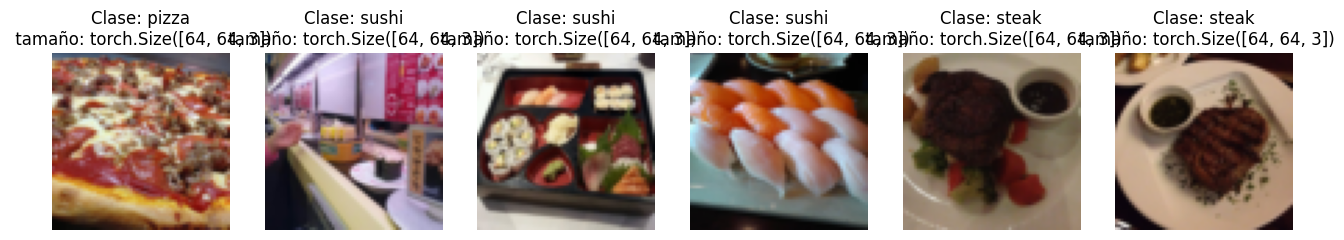

In [34]:
display_random_images(train_data, 
                      n=6,
                      classes=classes_name,
                      seed=None)

# Tranformemos nuestras imagenes cargadas en dataLoaders

Transformemos nuestras imagenes a dataloaders, esto nos permitirá iterar y asignarle propiedades a estas, siendo tratadas como elementos y no solo como imagenes.

In [35]:
from torch.utils.data import DataLoader

BATH_SIZE = 32  
train_data_loader_custom = DataLoader(dataset=train_data_custom,
                                      batch_size=BATH_SIZE,
                                      num_workers=0,
                                      shuffle=True)

test_data_loader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=BATH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=False)

train_data_loader_custom, test_data_loader_custom

(<torch.utils.data.dataloader.DataLoader at 0x21c94204cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x21c933ff820>)

# Data augmentation

Proceso de agregar artificialmente diversidad a set de datos de entrenamiento.
En caso de tener imagenes aplicaremos transformaciones a las imagenes que no cambian su significado pero si aumentan su variedad.

In [36]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # Ver documentación asociada, es un tema muy complejo y por lo que dice el curso requiere de experimentación
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [37]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

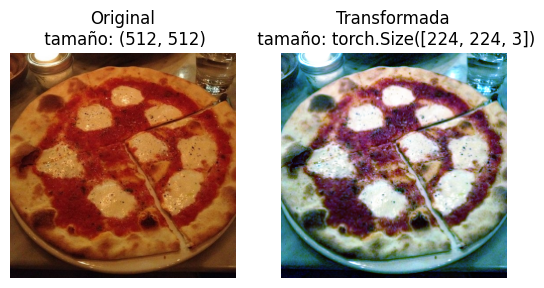

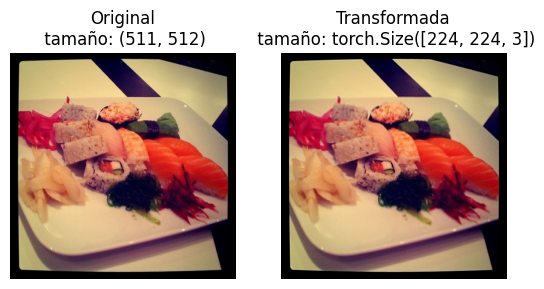

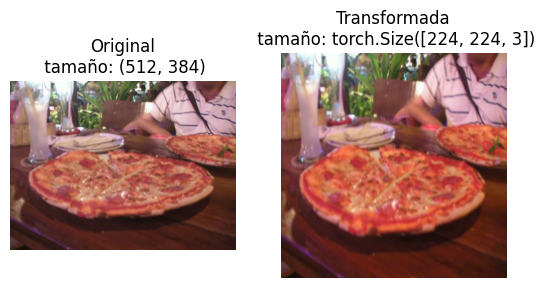

In [38]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

# Repliquemos la arquitectura TinyVGG sin _data agumentation_

La misma se encuentra en el sitio de *cnn-expleiner*.

In [40]:
# Crearémos transformaciones al tamaño de nuestros datos para adaptarlos a los requerimientos de la arquitectura, tal como pueden ser los input.

# Input:

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

# 1. Cargar y transformar set de datos:

from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, 
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Transformar datasets en dataLoaders

import os
from torch.utils.data import DataLoader

# Configuración del tamaño de lotes y procesadores a utilizar (de esto ultimo no tengo idea, por alguna razón mi PC tiene 12 procesadores??, el caso es que sirven todos... )

BATH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_data_loader_simple = DataLoader(dataset=train_data_simple,
                                        batch_size=BATH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)

test_data_loader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=False)


# Clase TinyVGG

"Documentación" : ) asociada para leer, muy interesante: https://horace.io/brrr_intro.html

In [41]:
class TinyVGG(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        
        return x # No es la manera más eficiente en terminos de coste computacional realizar este tipo de return, sin embargo no viene al caso ahora dado que el ejemplo es muy simple y con fines educativos. 

In [42]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(classes_name))

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [43]:
image_batch, label_batch = next(iter(train_data_loader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# model_0(image_batch)

# Usemos ahora 'torchinfo' para ver las características de nuestros modelos

Analizar la estructura de nuestros modelos se resume a una linea de código, interpretarlo no será fácil pero tampoco imposible.

In [45]:
from torchinfo import summary

summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

# Ciclo de entrenamiento y prueba

In [46]:
# Entrenamiento

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    
    model.train()
    
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        # 1. Fordward pass
        y_pred = model(X)

        # 2. Calcular perdida
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # Acumulada

        # 3. Optimizador zero grad

        optimizer.zero_grad()

        # 4. Retropropagación perdida

        loss.backward()

        # 5. Optimizar pasos

        optimizer.step()

        # Exactitud

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)    # No tengo idea de que hace acá

    # Promedio de perdida y exactitud por lote de entrenamiento
    train_loss = train_loss / len(dataloader) 
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
        

In [47]:
# prueba

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module): 
    
    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            # 1. Fordward pass
            test_pred_logits = model(X)

            # 2. Calcular perdida
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # 3. Calcular exactitud

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    
    # Promedio y perdida y exactitud por lote de prueba
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

    return test_loss, test_acc

Estas funciones ya las habiamos realizado previamente.

Si bien cumplen su función lo cierto es que pueden mejorarse aún más: podemos crear una función train() y combinar estas en una sola.

In [48]:
from tqdm.auto import tqdm

# Nuestra función de entrenamiento tendrá: parametros del modelo, función de optimización, perdida y epocas

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epocas: int= 5):
    
    # Diccinario de listas, guardarán los resultados de nuestros ciclos de entrenamiento y prueba

    resultados = {"perdida_entrenamiento": [],
                  "exactitud_entrenamiento": [],
                  "perdida_prueba": [],
                  "exactitud_prueba": []}
    
    # Epoca tras epoca se llama a las funciones anteriormente creadas, curiosamente pasaremos los mismos parametros solo que escribiremos menos código, una idea super inteligente para llevar 3 funciones a una sola sin perder eficiencia
    for epoca in tqdm(range(epocas)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        
        test_loss, test_acc = test_step(model=model,
                                         dataloader=test_dataloader, 
                                         loss_fn=loss_fn)
        
        print(f"Epoca: {epoca}, perdida durante el entrenamiento: {train_loss:.3f}, exactitud durante el entrenamiento: {train_acc:.3f} || perdida en la prueba: {test_loss:.3f}, exactitud en la prueba: {test_acc:.2f}")

        resultados["perdida_entrenamiento"].append(train_loss)
        resultados["exactitud_entrenamiento"].append(train_acc)
        resultados["perdida_prueba"].append(test_loss)
        resultados["exactitud_prueba"].append(test_acc)

    return resultados

c:\Users\marti\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Probemos ahora si un modelo con la arquitectura TinyVGG junto a las funciones creadas

Tal como podemos observar, el modelo no es el mejor que digamos... dado que nuestra función guarda un diccionario con datos de perdida y exactitud tanto en la prueba como en el entrenamiento no hay problema tampoco: podrémos gráficarlos y ver como mejorar el modelo.

In [49]:
torch.manual_seed(42)

N_EPOCAS = 5

# Creamos model_0

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes))

# model_0

# Función de perdida y optimización
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer() 

# Entrenaremos el model_0 con la función creada arriba

model_0_results = train(model=model_0,
                        train_dataloader=train_data_loader_simple,
                        test_dataloader=test_data_loader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epocas=N_EPOCAS) 

end_time = timer()
print(f"Tiempo total de entrenamiento: {end_time - start_time:.3f} segundos")

 20%|██        | 1/5 [00:25<01:40, 25.05s/it]

Epoca: 0, perdida durante el entrenamiento: 1.108, exactitud durante el entrenamiento: 0.258 || perdida en la prueba: 1.136, exactitud en la prueba: 0.26


 40%|████      | 2/5 [00:48<01:11, 23.97s/it]

Epoca: 1, perdida durante el entrenamiento: 1.085, exactitud durante el entrenamiento: 0.426 || perdida en la prueba: 1.162, exactitud en la prueba: 0.20


 60%|██████    | 3/5 [01:10<00:45, 23.00s/it]

Epoca: 2, perdida durante el entrenamiento: 1.115, exactitud durante el entrenamiento: 0.293 || perdida en la prueba: 1.170, exactitud en la prueba: 0.20


 80%|████████  | 4/5 [01:31<00:22, 22.50s/it]

Epoca: 3, perdida durante el entrenamiento: 1.099, exactitud durante el entrenamiento: 0.414 || perdida en la prueba: 1.134, exactitud en la prueba: 0.20


100%|██████████| 5/5 [01:54<00:00, 22.80s/it]

Epoca: 4, perdida durante el entrenamiento: 1.099, exactitud durante el entrenamiento: 0.293 || perdida en la prueba: 1.143, exactitud en la prueba: 0.20
Tiempo total de entrenamiento: 114.009 segundos


In [ ]:
# model_0_results

# Grafiquemos los datos

Teniendo la curva de perdida podrémos hacer un seguimiento del progreso del modelo a través del tiempo.

In [50]:
# Obtener las claves de model_0_results

model_0_results.keys()

def plot_loss_curves(resultados: Dict[str, List[float]]):
    # Datos del diccinario a graficar:
    loss = resultados["perdida_entrenamiento"] 
    test_loss = resultados["perdida_prueba"]

    accuracy = resultados["exactitud_entrenamiento"]
    test_accuracy = resultados["exactitud_prueba"]

    epocas = range(len(resultados["perdida_entrenamiento"]))

    # Grafico de perdida:

    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epocas, loss, label="Perdida en entrenamiento")
    plt.plot(epocas, test_loss, label="Perdida en prueba")
    plt.title("Perdida")
    plt.xlabel("Epoca")
    plt.legend()

    # Grafico de exactitud:
    plt.subplot(1, 2, 2)
    plt.plot(epocas, accuracy, label="Exactitud en entrenamiento")
    plt.plot(epocas, test_accuracy, label="Exactitud en prueba")
    plt.title("Exactitud")
    plt.xlabel("Epoca")
    plt.legend()

    

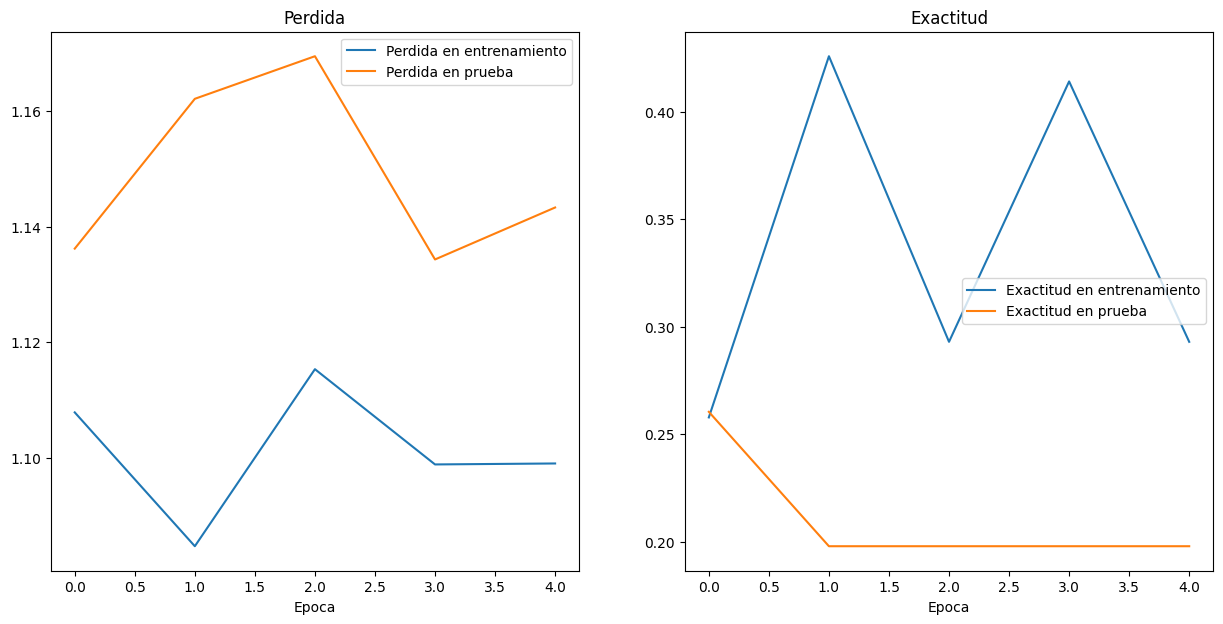

In [51]:
plot_loss_curves(model_0_results) # Va para atrás

El modelo creado nuevamente no es el mejor, para ver documentación asociada me valdré del siguiente link:
- https://developers.google.com/machine-learning/crash-course/overfitting/interpreting-loss-curves?hl=es-419

Nuestro gráfico de perdida y exactitud, en terminos altamente genericos, responderán a estos tres posibles casos:

<center><img src="img/grafico_perdida_exactitud.png"></center>

Aunque tal como se ve en la documentación esto no siempre es así, y acá viene el dolor de cabeza de entrenar nuestros modelos.

Sin animos de entrar mucho en detalle decimos que hay sobreentrenamiento cuando el modelo se entrena y tiene resultados absurdamente más precisos que nuestro modelo de entrenamiento, siguiendo más un patrón sin sentido que responde solo a los valores de entrenamiento que encontrando verdaderamente un patrón o aprendiendo.

El underfitting es cuando nuestro modelo simplemente no responde bien en lo absoluto.

Para lidear con el **sobreentrenamiento** podemos acudir a las siguientes estrategias:

1. Obtener más datos.
2. Realizar el anteriormente visto "data augmentation".
3. Obtener un set de datos mejor, recordemos que no todo set de datos sirve.
4. Usar transfer learning (se verá más adelante).
5. Simplificar nuestro modelo.
6. Usar la tasa de aprendizaje decaída en un nuevo entrenamiento.
7. Usar la, sin traducción, *"loss curve early stopping"*.

Para lidear con el **underfitting** podemos acudir a las siguientes estrategias:

1. Añadir más capas o unidades a nuestro modeo.
2. Ajustar el learning rate.
3. Entrenar por más tiempo o epocas.
4. Usar transfer learning
5. Usar menos regualización.

# model_1: tinyVGG con Data Augmentation

Tal como vimos anteriormente el modelo no respondio para nada bien a nuestro set de datos, por lo que realizaremos algunos cambios.

La buena noticia es que la función de entrenamiento ya fue creada, no hay nada más que hacer.

In [52]:
# Training transform con TrivialAugmentWide

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [53]:
# Datasets

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transforms_simple)

In [54]:
# Dataloaders
BATH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_data_loader_augmented = DataLoader(dataset=train_data_augmented,
                                         batch_size=BATH_SIZE,
                                         shuffle=True,
                                         num_workers=NUM_WORKERS)

test_data_loader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)

In [56]:
# Modelo
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes))

In [57]:
torch.manual_seed(42)
EPOCAS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_timer = timer()

# Entrenar modelo 1
model_1_results = train(model=model_1,
                        train_dataloader=train_data_loader_augmented,
                        test_dataloader=test_data_loader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epocas=EPOCAS)

end_timer = timer()
print(f"El tiempo total de entrenamiento es: {end_timer - start_timer:.3f}")

 20%|██        | 1/5 [00:23<01:32, 23.14s/it]

Epoca: 0, perdida durante el entrenamiento: 1.107, exactitud durante el entrenamiento: 0.250 || perdida en la prueba: 1.106, exactitud en la prueba: 0.26


 40%|████      | 2/5 [00:45<01:08, 22.83s/it]

Epoca: 1, perdida durante el entrenamiento: 1.079, exactitud durante el entrenamiento: 0.426 || perdida en la prueba: 1.139, exactitud en la prueba: 0.26


 60%|██████    | 3/5 [01:08<00:45, 22.78s/it]

Epoca: 2, perdida durante el entrenamiento: 1.080, exactitud durante el entrenamiento: 0.426 || perdida en la prueba: 1.170, exactitud en la prueba: 0.26


 80%|████████  | 4/5 [01:31<00:22, 22.75s/it]

Epoca: 3, perdida durante el entrenamiento: 1.129, exactitud durante el entrenamiento: 0.305 || perdida en la prueba: 1.162, exactitud en la prueba: 0.26


100%|██████████| 5/5 [01:54<00:00, 22.84s/it]

Epoca: 4, perdida durante el entrenamiento: 1.089, exactitud durante el entrenamiento: 0.426 || perdida en la prueba: 1.148, exactitud en la prueba: 0.26
El tiempo total de entrenamiento es: 114.178


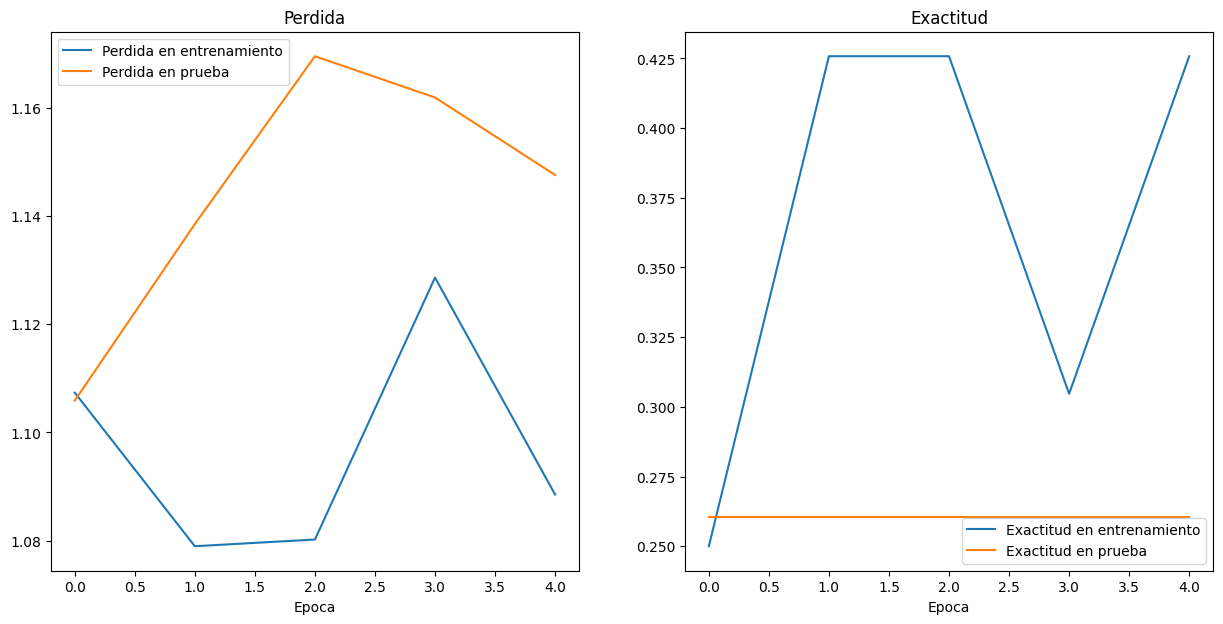

In [58]:
plot_loss_curves(model_1_results) # Sigue siendo bastante malo...

# Comparación de los resultados de modelos  
Después de evaluar los modelos experimentales es importante compararlos entre sí.
Para esto hay diferentes maneras:
1. Hardcoding
2. PyTorch + TensorBoard - https://docs.pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
3. Weigths & Biases - https://wandb.ai/site/
4. MLFLow - https://mlflow.org/

In [59]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

perdida_entrenamiento  exactitud_entrenamiento  perdida_prueba  \
0               1.107836                 0.257812        1.136208   
1               1.084645                 0.425781        1.162166   
2               1.115320                 0.292969        1.169545   
3               1.098815                 0.414062        1.134331   
4               1.098983                 0.292969        1.143334   

   exactitud_prueba  
0          0.260417  
1          0.197917  
2          0.197917  
3          0.197917  
4          0.197917

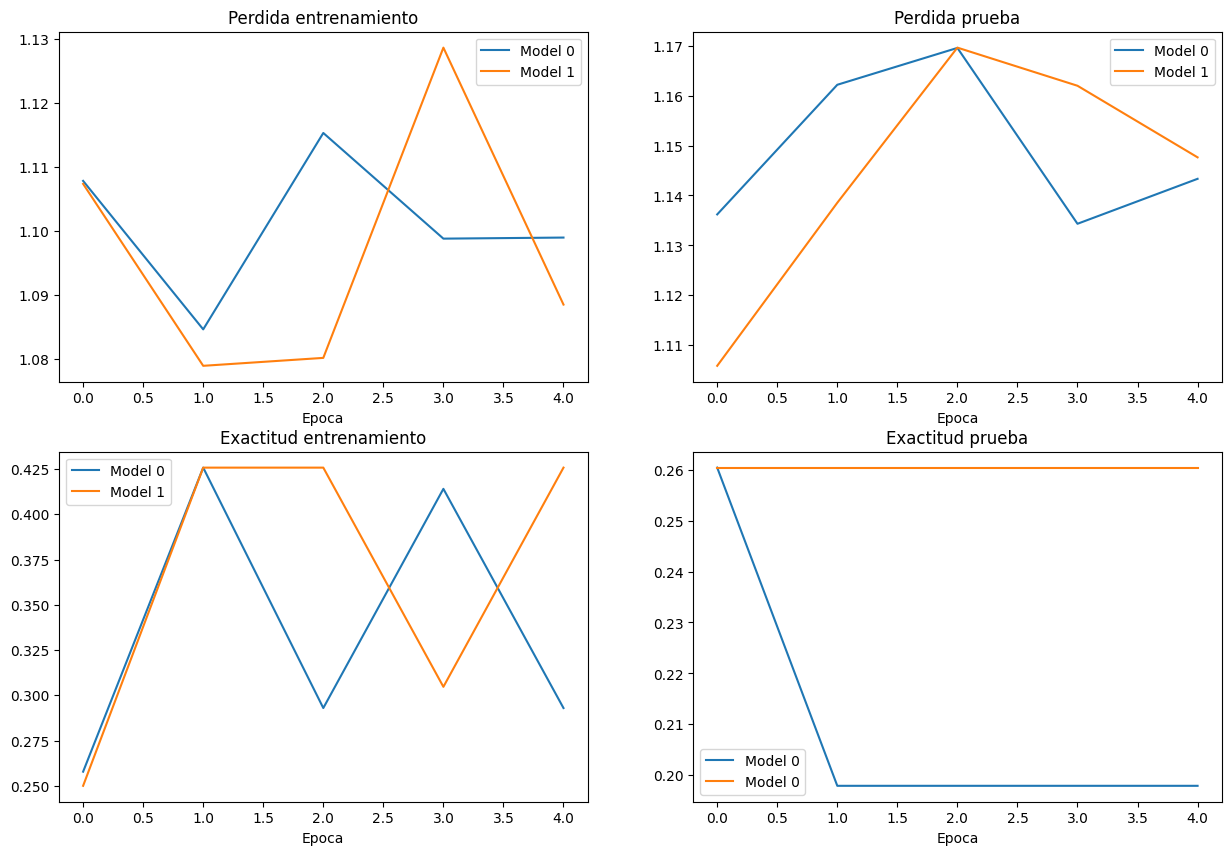

In [60]:
plt.figure(figsize=(15, 10))

epocas = range(len(model_0_df)) # (0 - len)

# Perdida durante el entrenamiento
plt.subplot(2, 2, 1)
plt.plot(epocas, model_0_df["perdida_entrenamiento"], label="Model 0")
plt.plot(epocas, model_1_df["perdida_entrenamiento"], label="Model 1")
plt.title("Perdida entrenamiento")
plt.xlabel("Epoca")
plt.legend()

# Perdida durante la prueba
plt.subplot(2, 2, 2)
plt.plot(epocas, model_0_df["perdida_prueba"], label="Model 0")
plt.plot(epocas, model_1_df["perdida_prueba"], label="Model 1")
plt.title("Perdida prueba")
plt.xlabel("Epoca")
plt.legend()

# Exactitud durante el entrenamiento
plt.subplot(2, 2, 3)
plt.plot(epocas, model_0_df["exactitud_entrenamiento"], label="Model 0")
plt.plot(epocas, model_1_df["exactitud_entrenamiento"], label="Model 1")
plt.title("Exactitud entrenamiento")
plt.xlabel("Epoca")
plt.legend()

# Exactitud prueba
plt.subplot(2, 2, 4)
plt.plot(epocas, model_0_df["exactitud_prueba"], label="Model 0")
plt.plot(epocas, model_1_df["exactitud_prueba"], label="Model 0")
plt.title("Exactitud prueba")
plt.xlabel("Epoca")
plt.legend()

# Realizando predicciones con una imagen propia

In [137]:
# En primer lugar debemos cargar la imagen, para esto el primer enfoque será cargarla desde una ruta especificada:
# import requests
# from pathlib import Path

# custom_image_path = Path("data/pizza.jpg")
# custom_image_path.parent.mkdir(parents=True, exist_ok=True)

# if not custom_image_path.is_file():
#   with open(custom_image_path, "wb") as f:
#        request = requests.get("https://raw.githubusercontent.com/martinzwaryczz/pyTorch_udemy_bootcamp/main/data/pizza.jpg")
#        print(f"Descargando {custom_image_path}... ... ... ")
#        f.write(request.content)
#else:
#    print(f"{custom_image_path} ya axiste, no hace falta volver a descargar")

In [143]:
# Esto en realidad esta mal, lo hardcodie dado que no me traia bien la imagen del github, desconozco la razón.

from pathlib import Path

custom_image_path = Path("data/pizza.png")

if custom_image_path.is_file():
    print(f"La imagen se encuentra en el directorio: {custom_image_path}")
else:
    print("La imagen no se encuentra en el directorio asignado")


La imagen se encuentra en el directorio: data\pizza.png


In [144]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8.shape
# custom_image_uint8

torch.Size([1, 360, 540])

Tamaño de la imagen normal: torch.Size([1, 360, 540])


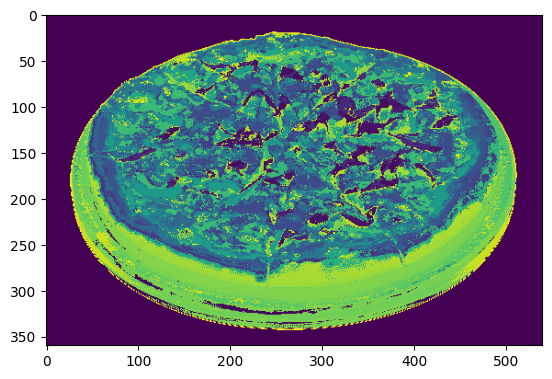

In [ ]:
# Acá toque algo y rompi todo, no deberia verse así...
plt.imshow(custom_image_uint8.permute(1, 2, 0))
print(f"Tamaño de la imagen normal: {custom_image_uint8.shape}")
# plt.axis("off")

In [157]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) 
custom_image = custom_image / 255 # Investigar el porque de 255
custom_image.shape

torch.Size([1, 360, 540])

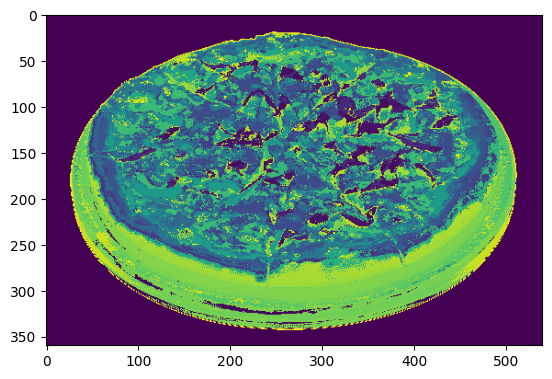

In [159]:
plt.imshow(custom_image.permute(1, 2, 0))
# plt.axis(False)

In [115]:
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

custom_image_transformed = custom_image_transform(custom_image)

custom_image.shape, custom_image_transformed.shape

(torch.Size([3, 400, 600]), torch.Size([3, 64, 64]))

In [119]:
# plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [120]:
# plt.imshow(custom_image.permute(1, 2, 0))

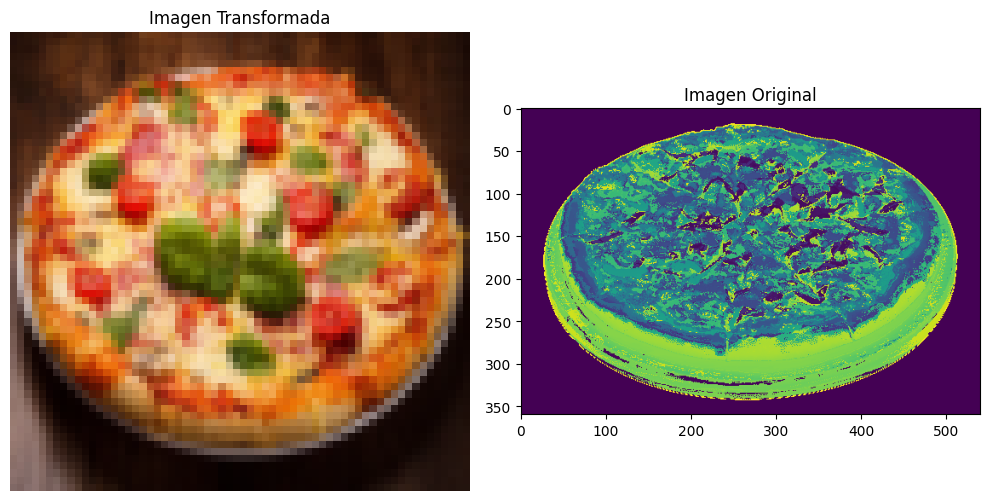

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

axes[0].imshow(custom_image_transformed.permute(1, 2, 0).numpy())  
axes[0].axis('off') 
axes[0].set_title('Imagen Transformada')  

axes[1].imshow(custom_image.permute(1, 2, 0).numpy()) 
axes[1].set_title('Imagen Original')  

plt.tight_layout()  
plt.show()

In [163]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [164]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0))

Para realizar predicciones con una imagen propia debemos:

1. Cargar nuestra imagen y transformarla en un tensor.
2. Asegurarnos de que la imagen sea del mismo tipo que nuestro modelo.
3. Asegurarnos de que la imagen tenga el mismo tamaño que el asignado al modelo.
4. Asegurarnos de que la imagen este en el mismo procesador (al estar ejecutando esto en mi PC personal siempre es el CPU...).

In [165]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3721, 0.3403, 0.2875]])

In [167]:
custom_image_pred_labels = torch.argmax(custom_image_pred, dim=1)
custom_image_pred_labels
classes_name[custom_image_pred_labels]

'pizza'

# Función, ahora si, para predecir con nuestra imagen la comida en cuestión...

In [185]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None):
    
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    target_image = target_image / 255.0

    # Esta parte (el primer if)la hice con ayuda de chatgpt, no andaba sino y no quedo otra
    if target_image.shape[0] == 1:
        target_image = target_image.repeat(3, 1, 1)

    if transform:
        target_image = transform(target_image)

    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)

        target_image_pred = model(target_image)

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1) # Probabilbidades
    target_image_pred_labels = torch.argmax(target_image_pred_probs, dim=1) # Clase

    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # Sacamos la dimensión extra y reasignamos el tamaño a altura, anchura y colores

    if class_names:
        title = f"Pred: {class_names[target_image_pred_labels]} | Prob: {target_image_pred_probs.max():.3f}"
    
    plt.title(title)
    plt.axis(False)

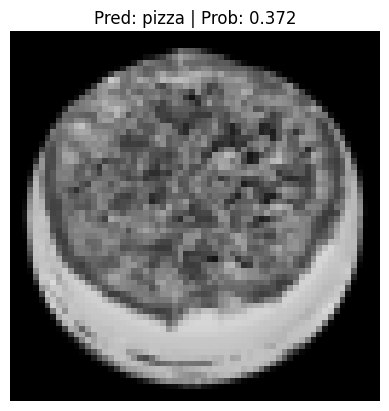

In [ ]:
pred_and_plot_image(model=model_1, # Podemos incluso cambiar el modelo y probar también, la función es una locura, el model_0 tira cualquiera
                    image_path=custom_image_path,
                    class_names=classes_name,
                    transform=custom_image_transform)

# # Pequeño (muy pequeño) resumen sobre los set de datos de Pytorch y que debemos tener en cuenta:
<center><img src="img/resumen_dataset.png"></center>